## Recurrent Neural Network RNN

LSTM/GRU

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import glob
import datetime
import numpy as np
import datetime
from pathlib import Path
import os
import talib as ta

In [3]:
# due working at home and work windows and linux
import platform
import os

if platform.system() == 'Windows' and platform.release() == '10':
    os.chdir(r'L:\andre\PycharmProjects\geonumerics\ipython_notebooks\Stocks')
elif platform.system() == 'Windows' and platform.release() == '7':
    os.chdir(r'C:\Data\VBShared\ipython_notebooks\Stocks')
elif platform.system() == 'Linux' and platform.node() == 'riossm31012722':
    os.chdir('/media/windows/Data/VBShared/ipython_notebooks/Stocks')
elif platform.system() == 'Linux' and platform.node() == 'andre-PredatorG3571':
    os.chdir('/home/andre/PycharmProjects/gitstocks/stocks')

In [6]:
cd C:\Users\alferreira\Downloads\stocks

[Errno 2] No such file or directory: 'C:UsersalferreiraDownloadsstocks'
/home/andre/PycharmProjects/gitstocks/stocks


In [4]:
from Tools import Meta5_Ibov_Load as meta5_ibov_load

In [5]:
import importlib
importlib.reload(meta5_ibov_load)

<module 'Tools.Meta5_Ibov_Load' from '/home/andre/PycharmProjects/gitstocks/stocks/Tools/Meta5_Ibov_Load.py'>

### Set data bundle path and csv data path 

#### And Load *.csv files  if  needed

In [6]:
if platform.system() == 'Windows' and platform.release() == '10':
    meta5_ibov_load.Set_Data_Path(r'L:\andre\PycharmProjects\geonumerics\ipython_notebooks\Stocks\data',
                                 r'L:\andre\PycharmProjects\geonumerics\ipython_notebooks\Stocks\2016_stocks\2016_2018_M1')
elif platform.system() == 'Windows' and platform.release() == '7':
    meta5_ibov_load.Set_Data_Path(r'C:\Data\VBShared\ipython_notebooks\Stocks\data',
                                 r'C:\Data\VBShared\ipython_notebooks\Stocks\data')
elif platform.system() == 'Linux' and platform.node() == 'riossm31012722':
    meta5_ibov_load.Set_Data_Path(r'/media/windows/Data/VBShared/ipython_notebooks/Stocks/data',
                                r'/media/windows/Data/VBShared/ipython_notebooks/Stocks/2016_stocks/2016_2018_M1')
elif platform.system() == 'Linux' and platform.node() == 'andre-PredatorG3571':
    meta5_ibov_load.Set_Data_Path(r'/home/andre/PycharmProjects/gitstocks/stocks/data',
                            r'/home/andre/PycharmProjects/gitstocks/stocks/data')
    #os.chdir('/media/windows/Data/VBShared/ipython_notebooks/Stocks/2016_stocks\2016_2018_M1'')

master data loaded size (minutes) 507080
Symbols lodaded:
0    PETR4
1    BBDC4
2    BBAS3
3    ABEV3
4    ITUB4
5    VALE3
6     DOL$
dtype: object


In [10]:
meta5_ibov_load.Set_Data_Path(r'C:\Users\alferreira\Downloads\stocks\data',
                            r'C:\Users\alferreira\Downloads\stocks\data')

must load metatrader 5 *.mt5bin files


In [7]:
masterdf = meta5_ibov_load.Load_Meta5_Data()

Data already loaded


### Prepare data for training and classification
and Save Data Prepared

In [70]:
df = meta5_ibov_load.FixedColumnNames()

In [71]:
import os

In [10]:
os.chdir(meta5_ibov_load.path_bin_data)

### Almost ready data, just missing standard scaler

In [81]:
X = pd.read_pickle('X_train_corr_clean.pickle')

In [82]:
X.head(1)

,PETR4_O,PETR4_T,PETR4_R,BBDC4_O,BBDC4_T,BBDC4_R,BBAS3_T,BBAS3_R,ABEV3_O,ABEV3_T,...,rsi_2weekday,ema_2minute,macdminute,macd_meanminute,PETR4_C_PETR4_T,PETR4_T_PETR4_R,BBAS3_R_ABEV3_O,ABEV3_C_ABEV3_T,DOL$_R_hour,hour_weekday
time,,,,,,,,,,,,,,,,,,,,,
2015-01-26 15:24:00,9.89,6.0,6.0,19.44,6.0,4.0,4.0,3.0,15.67,5.0,...,0.0,27.687319,-1.26999,-0.39363,15.88,12.0,18.67,20.67,20.0,15.0


In [83]:
#X = pd.read_pickle('PETR4_xtrain.pickle')
#y = pd.read_pickle('PETR4_ytrain.pickle')

In [84]:
%matplotlib inline

In [85]:
span=60
X['y'] = np.nan
sma = ta.SMA(X.PETR4_O.values, span)
X['sma'] = sma
X.sma = X.sma.shift(-span)
X.loc[X.sma > X.PETR4_O, 'y'] = 1
X.loc[X.sma < X.PETR4_O, 'y'] = 0

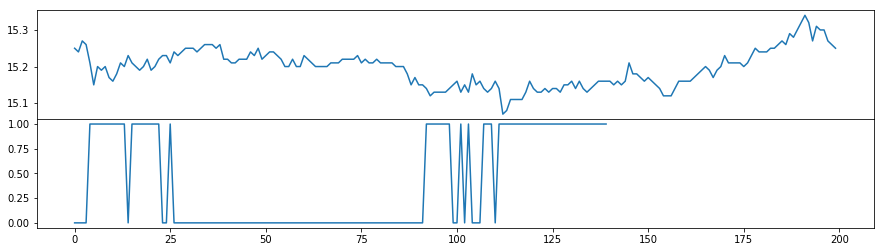

<Figure size 720x216 with 0 Axes>

In [86]:
f, axr = plt.subplots(2, sharex=True, figsize=(15,4))
f.subplots_adjust(hspace=0)
#axr[0].plot(X[target_quote].values)
axr[0].plot(X[-200:].PETR4_O.values)
#axr[0].plot(df.loc[index_window, 'PETR4'].values[:-60])
plt.figure(figsize=(10,3))
axr[1].plot(X[-200:].y.values)

In [87]:
X = X.dropna() # drop the last 60 minutes (can be used only for prediction on real time)
y = X.y
#y[X.index]
#y = X.y
y.unique()
X.drop(['y','sma'], axis=1, inplace=True)

#### Target price

In [88]:
tprice = X.PETR4_O.values

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(X)
##    X[c] = preprocessing.scale(X[c]) # unit variance 
#X[c] = (X[c] - X[c].mean())/X[c].std() # zscore normalization
X[:] = scaler.transform(X)   

In [90]:
X.head(1)

,PETR4_O,PETR4_T,PETR4_R,BBDC4_O,BBDC4_T,BBDC4_R,BBAS3_T,BBAS3_R,ABEV3_O,ABEV3_T,...,rsi_2weekday,ema_2minute,macdminute,macd_meanminute,PETR4_C_PETR4_T,PETR4_T_PETR4_R,BBAS3_R_ABEV3_O,ABEV3_C_ABEV3_T,DOL$_R_hour,hour_weekday
time,,,,,,,,,,,,,,,,,,,,,
2015-01-26 15:24:00,-0.702122,0.77031,0.904312,-0.619666,0.340592,-0.136597,-1.130629,-1.216436,-1.47603,-0.323644,...,-1.962708,-0.92462,-0.232673,-0.192895,-0.41916,0.882454,-1.866617,-1.365993,0.649381,-0.083816


In [91]:
y.unique()

array([0., 1.])

### turn in a discrete serie so we can feed on an RNN

In [92]:
Xor = X
yor = y

In [93]:
X = X[10000:90000]
y = y[10000:90000]

In [94]:
amin, amax = tprice.min(), tprice.max()
bins = .08 # 8 cents

In [95]:
tprice = pd.cut(tprice, np.arange(amin-bins, amax+bins, bins))
tprice = tprice.codes
tprice = tprice.astype(float)

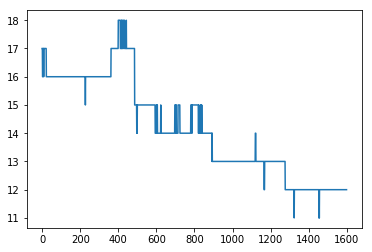

In [96]:
plt.plot(tprice[:1600]) # 10 hours

In [97]:
nclasses = len(np.unique(cprice))

In [98]:
nclasses

107

### One hot or Embedding? Start with embedding

Lets start with embeding since I can choose the dimension to be smaller than that of OneHot

Embedding is a hash of your class with statistical properties

## Simple sequential classifier one LSTM layer
### from many to many example at here 

https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

to: many to one

avoiding the break the example :S heehehe

In [99]:
from torch import nn
import torch as th

In [100]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")

In [125]:
class LSTMBinary(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, nlayers=1, out_size=2, batch=1):
        """
        num_xclasses : number of discrete (bucketized) classes representing the original float price values
        embedding_dim : dimension of the hash that represents each value (embedding)
        hidden_dim : hidden state size (keeps the relationship between the sequence values)
        nlayers : number of stacked LSTM layers
        out_size : dimension of output class 
        """
        super(LSTMBinary, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch = batch
        self.nlayers = nlayers
        #self.embeddings = nn.Embedding(num_xclasses, embedding_dim)
        
        # The LSTM takes embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, self.nlayers) # nlayers = 2 stacked
        # The linear layer that maps from hidden state space to output class space
        #self.intermed = th.rand() # attention layer ?
        #self.relu = nn.Softmax()
        self.hidden2out = nn.Linear(hidden_dim, out_size)
        self.hidden = self.init_hidden()
        self.fout = nn.Softmax(dim=1)


    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (th.zeros(self.nlayers, self.batch, self.hidden_dim).to(device),
                th.zeros(self.nlayers, self.batch, self.hidden_dim).to(device))

    def forward(self, sequence):
        #embeds = self.embeddings(sequence)
        # let's work directly with data prices no bucketize
        
        #print(embeds.shape)
        lstm_out, self.hidden = self.lstm(
            sequence.view(60, self.batch, -1), self.hidden)
        # output is 
        # (60, self.batch, hidden_dim)      
        # making matrix multiplication by 'attention weights'
        # not wasting 
        
        # just the last output of the sequence (60 length)
        # is what that matters for me (context vector)
        # print(lstm_out.shape)
        # entry is
        # (self.batch, hidden_dim)
        #print(lstm_out[0].shape)
        #print(lstm_out[0])        
        map_space = self.hidden2out(lstm_out[-1, :, :])
        # out is
        # (self.batch, 2 - outsize)
        class_scores = self.fout(map_space)
        return class_scores

### Input vector and labels are

1. X = cprice (bucketized stock prices) 
2. y = y.values

In [112]:
X.shape

(80000, 120)

In [ ]:
#X['cprice'] = cprice

In [40]:
#aX = cprice
#y = y.values

In [105]:
X = X.values

In [106]:
X.shape

(80000, 120)

In [107]:
y = y.values

In [108]:
y.shape

(80000,)

#### Select a random sample pair

Every last 60 minutes price values from now corresponds to one class value.  
The current class value that corresponds to the average behavior on the next 60 minutes.

In [118]:
import random
def randomSample(X, y):
    i = random.randint(60, len(X) - 1)    
    return th.tensor(X[i-59:i+1], dtype=th.long).to(device), th.tensor(y[i], dtype=th.long).to(device) 

def randomBatch(X, y, batch_size=12):
    i = random.randint(60, len(X) - 1 - batch_size)    
    X_batches = th.tensor([ X[i-59:i+1] for i in range(i, i+batch_size)], dtype=th.float)
    y_batches = th.tensor(y[i:i+batch_size], dtype=th.long) 
    return X_batches.to(device), y_batches.to(device)

In [119]:
X_t, y_t = randomBatch(X, y, batch_size=64)

In [120]:
X_t.shape

torch.Size([64, 60, 120])

In [110]:
#nclass = len(np.unique(X))
#print(nclass)

7118962


In [126]:
#embedding_dim=3 there are no embeddings anymore
hidden_dim=256

In [127]:
# change here if you wish OPTIONS
# shift=60
nforecast=60
nvalidation=nforecast # to validate the model prior prediction
ntraining = 5*8*60 # 8 hours before for training
nwindow = nvalidation+nforecast+ntraining 
batch_size=64

In [ ]:
model = LSTMBinary(120, hidden_dim, batch=batch_size)
model = model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = th.optim.Adagrad(model.parameters(), lr=0.01)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
#with torch.no_grad():
#    inputs = prepare_sequence(training_data[0][0], word_to_ix)
#    tag_scores = model(inputs)
#    print(tag_scores)

losses = []

# X_test = th.tensor(X[endi:endi+nvalidation])
# y_test = th.tensor(y[endi:endi+nvalidation])
# X_test = X_test.to(device)
# y_test = y_test.to(device)

maxepochs=1000
for epoch in range(maxepochs):  
    X_t, y_t = randomBatch(X[:ntraining], y[:ntraining], batch_size=batch_size)
    
    #for sentence, tags in training_data:
    # Step 1. Remember that Pytorch accumulates gradients.
    # We need to clear them out before each instance
    model.zero_grad()

    # Also, we need to clear out the hidden state of the LSTM,
    # detaching it from its history on the last instance.
    model.hidden = model.init_hidden()

    # Step 2. Get our inputs ready for the network, that is, turn them into
    # Tensors of word indices.
    #sentence_in = prepare_sequence(sentence, word_to_ix)
    #targets = prepare_sequence(tags, tag_to_ix)

    # Step 3. Run our forward pass.
    ypred = model(X_t)

    # Step 4. Compute the loss, gradients, and update the parameters by
    #  calling optimizer.step()
    loss = loss_function(ypred, y_t)
    loss.backward()
    optimizer.step()    
    losses.append(loss.item())
    
    
#     ######################
#     # Model Evaluation
#     ######################
#     model.eval()
 
#     # calculate percentage accuracy
#     # on validation set
#     y_pred = model(X_test) 
#     lossv = criterion(y_pred, y_test)
#     y_pred = th.argmax(y_pred, 1)
#     error_validation = th.nn.functional.mse_loss(
#         y_pred.float(), y_test.float())
#     ### error on validation set next 60 samples / minutes

#     loss_validation = lossv.item()
#     loss_training = lossy.item()
#     vloss.append(loss_validation)
#     yloss.append(loss_training)
   
#     model.train()

#     if lossv < best_lossv: # now loss for validation is smaller
#         # lets save this network
#         best_lossv = lossv
#         best_lossy = lossy
#         best_model = model.state_dict() # save the actual weights
#         # to restore the weighst you use 
#         #model.load_state_dict(best_model
    
    
    if epoch%int(maxepochs/10) == 0: 
        # with the absolute value of the training set
        print("iteration : {:6d} l training: {:.2f}".format(
              epoch, loss))
        #print(epoch, loss.item())

iteration :      0 l training: 0.71
iteration :    100 l training: 0.56
iteration :    200 l training: 1.00
iteration :    300 l training: 0.85


In [ ]:
sample = X_t.view(60, batch_size, -1)
sample.shape
plt.figure(figsize=(15,3))
plt.plot(losses, ',-', lw=0.3)

In [130]:
th.argmax(ypred, dim=1)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0], device='cuda:0')

In [131]:
y_t

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0], device='cuda:0')

## Encoder-Decoder Atettion RNN

It is not exactly an attention RNN but has some of it features

#### encoder receives 1 input
1. An input that is (60, batch_size, 1)  price values bucketized (integers turned in floats)
    * I will use the class floats directly as input (no embedding for now)

In [132]:
device

device(type='cuda')

In [211]:
class EncoderRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, nlayers=1, batch=1):
        """
        num_xclasses : number of discrete (bucketized) classes representing the original float price values
        embedding_dim : dimension of the hash that represents each value (embedding)
        hidden_dim : hidden state size (keeps the relationship between the sequence values)
        nlayers : number of stacked LSTM layers
        out_size : dimension of output class 
        """
        super(EncoderRNN, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch = batch
        self.nlayers = nlayers
        self.out = nn.GRU(input_dim, hidden_dim, self.nlayers) # nlayers = 2 stacked
        self.hidden = self.init_hidden()

    def init_hidden(self, batch_size=None):
        batch_size = self.batch if batch_size == None else batch_size
        return th.zeros(self.nlayers, batch_size, self.hidden_dim).to(device)
    
    def forward(self, input):    
        ## input is (60, self.batch, input_dim)        
        gru_out, self.hidden = self.out(
            input.view(60, input.size(0), self.input_dim), self.hidden)
        return gru_out, self.hidden
        # output is 
        # (60, self.batch, hidden_dim)      
        # making matrix multiplication by 'attention weights'
        # not wasting 
        
#         # just the last output of the sequence (60 length)
#         # is what that matters for me (context vector)
#         # print(lstm_out.shape)
#         # entry is
#         # (self.batch, hidden_dim)
#         map_space = self.hidden2out(lstm_out[-1, :, :])
#         # out is
#         # (self.batch, 2 - outsize)
#         class_scores = self.fout(map_space)
#         return class_scores

#### The decoder receives 3 inputs

1. An additional input that is (60, batch_size, 1)  
    * the previous 60 target class values  
2. The last hidden state from the encoder is (1, batch_size, encoder_hidden_size)  
3. The output's from the encoder is (60, batch_size, encoder_hidden_size)  

In [212]:
# tutorial example is for single word per time (not a sequence) and no batches
# i am modifying it to use a sequence as input and also batches
class AttnDecoderRNN(nn.Module):
    def __init__(self, ehidden_size, batch_size=64, input_size=60, output_size=2):
        super(AttnDecoderRNN, self).__init__()
        self.ehidden_size = ehidden_size
        self.batch_size = batch_size
        
        # turn the input in the the same size as the encoder hidden size
        self.tnorm = nn.Linear(input_size, self.ehidden_size) 
        self.dropout = nn.Dropout(0.1)
        # cat between input (norm) + encoder hidden
        self.softmax1 = nn.Softmax(dim=1)
        # will combine the encoder hidden with the input to make the attention weights
        self.attn = nn.Linear(self.ehidden_size * 2, 60)        
        self.relu = nn.ReLU()
        # reduce dimensionality to out_size
        self.gout = nn.Linear(self.ehidden_size, output_size)
        self.softmax2 = nn.Softmax(dim=1)
#         self.dropout = nn.Dropout(0.1)
#         self.gru = nn.GRU(self.hidden_size, self.hidden_size)
#         self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, e_hidden, e_out):
        # input is (batch_size, 60)
        # turn in the ehidden_size size
        tnorm = self.tnorm(input.view(1, input.size(0), -1)) 
        tnorm = self.dropout(tnorm) # per example
        #print(tnorm.shape)
        #input_size = 60 # the input dimension is 60 that is y_t values        
        #print(tnormout.shape)
        #print(ehidden.shape)
        mixhidden = th.cat((tnorm[0], ehidden[0]), 1)
        #print(mixhidden.shape)
        # turn attweights in weights of probabilities in each batch, summing 1.
        attn_weights = self.softmax1(mixhidden) 
        #print(attn_weights.shape)
        attn_weights = self.attn(attn_weights)        
        # att weights applied on temporal outputs of encoder
        attn_applied = th.bmm(attn_weights.view(input.size(0), 1, 60), 
                              eout.view(input.size(0), 60, self.ehidden_size))
        attn_applied = self.relu(attn_applied.squeeze(1))
        
        # missing this part still the performance is awesomeee!!!!
        # with 400 iterations
        #output = torch.cat((embedded[0], attn_applied[0]), 1)
        #output = self.attn_combine(output).unsqueeze(0)
        
        #print(attn_applied.shape)        
        output = self.softmax2(self.gout(attn_applied))
        return output

#     def initHidden(self):
#         return th.zeros(1, 1, self.hidden_size, device=device)

In [213]:
hidden_dim=256

In [214]:
# change here if you wish OPTIONS
# shift=60
nforecast=60
nvalidation=nforecast # to validate the model prior prediction
ntraining = 5*8*60 # 8 hours before for training
nwindow = nvalidation+nforecast+ntraining 
batch_size=32

### Need to change here. 

Change the additional input to be the price of the last 60 minutes  
and the input be the N endogenous series

In [215]:
X.shape

(80000, 120)

In [216]:
def EncoderDecoderRandomBatch(X, y, batch_size=12):
    i = random.randint(60, len(X) - 1 - batch_size)    
    Xe_batches = th.tensor([ X[i-59:i+1] for i in range(i, i+batch_size)], dtype=th.float) # input encoder    
    # teach forcing? additional input is the last 60 minutes of the targe PETR4 action
    # input for decoder previous 60 targets
    yd_batches = th.tensor([ X[i-60:i, 0] for i in range(i, i+batch_size)], dtype=th.float) 
    y_batches = th.tensor(y[i:i+batch_size], dtype=th.long)  # target class
    return Xe_batches.to(device), yd_batches.to(device), y_batches.to(device)

In [217]:
def TestSample(X, y, i, batch_size=12):
    Xe_batches = th.tensor([ X[i-59:i+1] for i in range(i, i+batch_size)], dtype=th.float) # input encoder    
    # teach forcing? additional input is the last 60 minutes of the targe PETR4 action
    # input for decoder previous 60 targets
    yd_batches = th.tensor([ X[i-60:i, 0] for i in range(i, i+batch_size)], dtype=th.float) 
    y_batches = th.tensor(y[i:i+batch_size], dtype=th.long)  # target class
    return Xe_batches.to(device), yd_batches.to(device), y_batches.to(device)

In [218]:
%%time
hidden_dim=256
encoder = EncoderRNN(input_dim=120, hidden_dim=hidden_dim, batch=batch_size)
encoder = encoder.to(device)
decoder = AttnDecoderRNN(hidden_dim, batch_size=batch_size)
decoder = decoder.to(device)
loss_function = nn.CrossEntropyLoss()
eoptimizer = th.optim.Adagrad(encoder.parameters(), lr=0.007)
doptimizer = th.optim.Adagrad(decoder.parameters(), lr=0.008)

yloss = [] # loss in training data set
vloss = [] # loss in the validation data set
best_lossv = 1000
best_model = None
best_lossy = 1000

begin=15
starti = begin
endi = begin+ntraining

# 60 samples for validation 59 after the last samples
Xe_v, yd_v, y_v = TestSample(X, y, endi+61, 60)

maxepochs=500
for epoch in range(maxepochs):  
    Xe_t, yd_t, y_t = EncoderDecoderRandomBatch(X[starti:endi], y[starti:endi], batch_size=batch_size)

    encoder.zero_grad()
    decoder.zero_grad()
    
    encoder.hidden = encoder.init_hidden()    
    # all the outputs + the last hidden state
    eout, ehidden = encoder(Xe_t.float()) 
    ypred = decoder(yd_t.float(), ehidden, eout)
    lossy = loss_function(ypred, y_t)

    lossy.backward()    
    eoptimizer.step()    
    doptimizer.step()    
    
    yloss.append(lossy.item())   
    
    encoder.eval()
    decoder.eval()
    
    # the validation batch is of 60 samples
    encoder.hidden = encoder.init_hidden(batch_size=60)    
    # all the outputs + the last hidden state
    eout, ehidden = encoder(Xe_v.float()) 
    ypred = decoder(yd_v.float(), ehidden, eout)
    lossv = loss_function(ypred, y_v)
    
    vloss.append(lossv.item())
    
    encoder.train()
    decoder.train()
    
    if epoch%int(maxepochs/10) == 0: 
        
        # with the absolute value of the training set
        print("iteration : {:6d} l training: {:.2f} l validation: {:.2f}".format(
              epoch, lossy, lossv))
        #print(epoch, loss.item())

iteration :      0 l training: 0.71 l validation: 0.66
iteration :     50 l training: 0.57 l validation: 0.85
iteration :    100 l training: 0.44 l validation: 1.02
iteration :    150 l training: 0.67 l validation: 1.06
iteration :    200 l training: 0.38 l validation: 1.06
iteration :    250 l training: 0.31 l validation: 0.64
iteration :    300 l training: 0.32 l validation: 0.75
iteration :    350 l training: 0.35 l validation: 0.69
iteration :    400 l training: 0.80 l validation: 0.68
iteration :    450 l training: 0.31 l validation: 0.68
CPU times: user 9.67 s, sys: 413 ms, total: 10.1 s
Wall time: 10.1 s


In [219]:
endi

2415

In [220]:
endi+60

2475

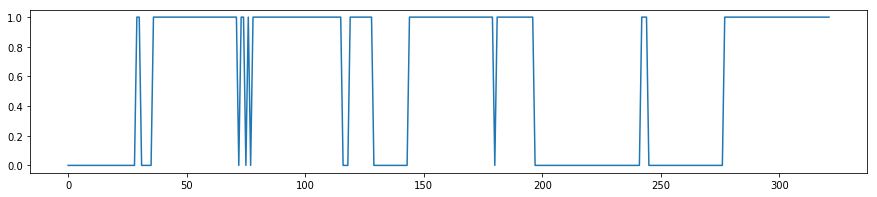

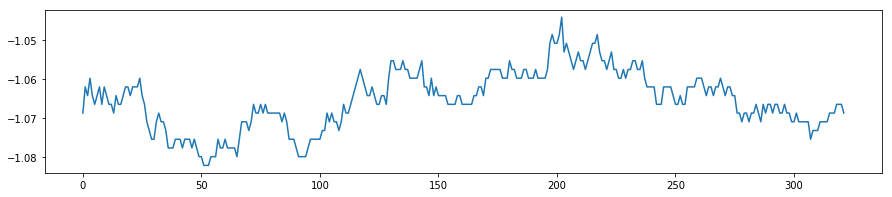

In [221]:
plt.figure(figsize=(15,3))
plt.plot(y[endi-200:endi+122])
plt.figure(figsize=(15,3))
plt.plot(X[endi-200:endi+122, 0])

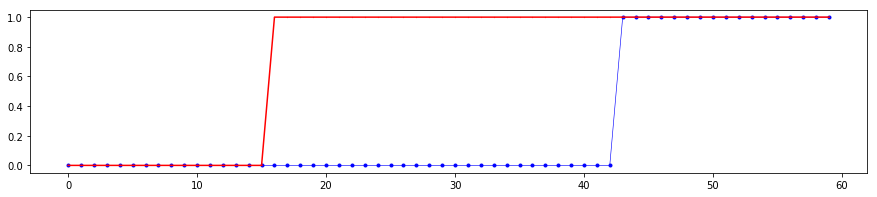

In [222]:
plt.figure(figsize=(15,3))
plt.plot(th.argmax(ypred, dim=1).to("cpu").data.numpy(), '-b.', lw=.6)
plt.plot(y_v.to("cpu").data.numpy(), '-r.', markersize=0.5, lw=1.5)
#plt.xlim(0, 200

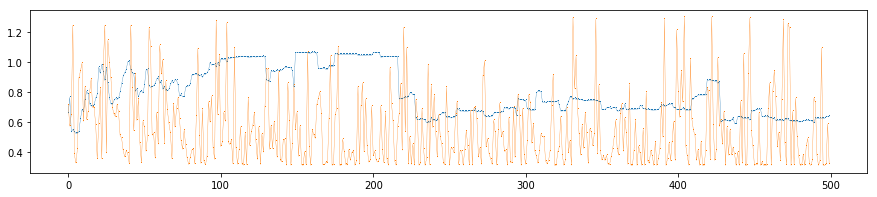

In [223]:
#sample = X_t.view(60, batch_size, -1)
#sample.shape
plt.figure(figsize=(15,3))
plt.plot(vloss, ',-', lw=0.3)
plt.plot(yloss, ',-', lw=0.3)

In [224]:
th.argmax(ypred, dim=1)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1], device='cuda:0')

In [225]:
y_v

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1], device='cuda:0')